In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
from lifelines.utils import survival_events_from_table
from lifelines import KaplanMeierFitter

In [2]:
survival = pd.read_csv("C:/Users/Atmaja/Desktop/r2_baseline_new.csv")

In [25]:
survival.head()

,pid,age,gender,ht,wt,bmi,ps,alb,bili,hgb,...,ang,target,egfr,protocolnum,conf_stat,br_stat,ttp_time,os_time,os_stat,arm
0,824L,72,1,1.625,63.6,24.085207,0.0,40.408687,0.9,14.9,...,1,1,0,2,0.44663,0.59068,9.363450,13.864476,1,2.06
1,825L,59,2,1.575,72.7,29.307130,0.0,40.408687,0.5,12.5,...,1,1,0,2,0.44663,0.59068,8.016427,30.882957,1,2.06
2,826L,66,1,1.828,92.9,27.801187,1.0,40.408687,0.7,15.0,...,1,1,0,2,0.44663,0.59068,14.225873,32.427105,1,2.06
3,870L,48,1,1.778,79.3,25.084744,1.0,40.408687,0.3,12.4,...,1,1,0,2,0.44663,0.59068,8.870637,25.527721,1,2.06
4,923L,67,1,1.829,62.6,18.713151,0.0,40.408687,0.3,9.5,...,1,1,0,2,0.44663,0.59068,7.129363,17.084189,0,2.06


In [4]:
df = pd.DataFrame(survival)
#df.drop(df.columns[[0]], axis=1, inplace=True)  

survival['os_stat'] = survival.os_stat.astype(float)        #change datatype
survival['os_stat'].dtype

survival['age'] = survival.age.astype(float)        #change datatype
survival['age'].dtype

survival['gender'] = survival.gender.astype(float)        #change datatype
survival['gender'].dtype

survival['protocolnum'] = survival.protocolnum.astype(float)        #change datatype
survival['protocolnum'].dtype

del df['ang']         
del df['pid'] 
del df['target'] 
del df['egfr']         #delete 'ang','target','pid','egfr'
survival.dtypes

age            float64
gender         float64
ht             float64
wt             float64
bmi            float64
ps             float64
alb            float64
bili           float64
hgb            float64
plt            float64
wbc            float64
anc            float64
ldh            float64
alk            float64
cea            float64
mindia         float64
maxdia         float64
sumdia         float64
numtumors      float64
braf           float64
kras           float64
rectum         float64
colon          float64
ln             float64
peritoneal     float64
lung           float64
liver          float64
bone           float64
surg           float64
surg_met       float64
resect_pt      float64
surg_pt        float64
chemo          float64
chemo_rgm      float64
protocolnum    float64
conf_stat      float64
br_stat        float64
ttp_time       float64
os_time        float64
os_stat        float64
arm            float64
dtype: object

In [35]:
cph = CoxPHFitter()
cph.fit(survival, duration_col='os_time', event_col='os_stat',show_progress=True)#same values for 0.1,0.5 stpsize only no.of step vary
cph.print_summary()

Iteration 1: norm_delta = 34.12917, step_size = 0.95000, ll = -28532.83395, newton_decrement = 1017.91209, seconds_since_start = 1.1
Iteration 2: norm_delta = 4.46422, step_size = 0.23750, ll = -27664.59912, newton_decrement = 192.69153, seconds_since_start = 2.3
Iteration 3: norm_delta = 5.39371, step_size = 0.28500, ll = -27583.54216, newton_decrement = 129.68562, seconds_since_start = 3.5
Iteration 4: norm_delta = 4.42993, step_size = 0.25137, ll = -27519.76835, newton_decrement = 77.63185, seconds_since_start = 4.7
Iteration 5: norm_delta = 4.58974, step_size = 0.29561, ll = -27485.51204, newton_decrement = 48.66560, seconds_since_start = 5.9
Iteration 6: norm_delta = 4.39718, step_size = 0.34764, ll = -27460.87584, newton_decrement = 27.26675, seconds_since_start = 7.2
Iteration 7: norm_delta = 3.82492, step_size = 0.40882, ll = -27445.12327, newton_decrement = 13.22638, seconds_since_start = 8.5
Iteration 8: norm_delta = 3.61538, step_size = 0.58871, ll = -27436.46227, newton_dec

In [36]:
X = survival.drop(["os_time", "os_stat"], axis=1)
cph.predict_partial_hazard(X)
cph.predict_survival_function(X)
cph.predict_survival_function(X, times=[5., 25., 50.])

,0,1,2,3,4,5,6,7,8,9,...,6933,6934,6935,6936,6937,6938,6939,6940,6941,6942
5.0,0.917848,0.934540,0.966882,0.902918,0.905286,0.910430,0.965531,5.071060e-01,6.113093e-01,0.965767,...,0.945272,0.961481,0.969988,0.895712,0.942751,0.895839,0.968742,0.964624,0.933728,0.952491
25.0,0.247033,0.331454,0.577336,0.189052,0.197304,0.216407,0.564320,1.548449e-05,3.263812e-04,0.566575,...,0.399309,0.526926,0.608338,0.165892,0.382290,0.166274,0.595723,0.555733,0.326788,0.452062
50.0,0.010819,0.028020,0.168919,0.004551,0.005226,0.007048,0.156898,2.681410e-16,5.175614e-12,0.158937,...,0.051207,0.125668,0.200087,0.002981,0.044472,0.003003,0.186963,0.149300,0.026764,0.076521


In [37]:
cph = CoxPHFitter()
scores = k_fold_cross_validation(cph, survival, 'os_time', event_col='os_stat', k=3)
print(scores)
print(np.mean(scores))
print(np.std(scores))      #k fold cross validation evaluates on testing set using concordance measure

[0.7413005626540323, 0.7456073963066872, 0.7345451751323809]
0.7404843780310335
0.0045528600777556705


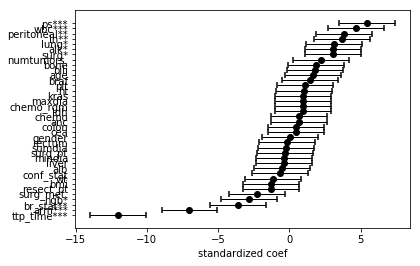

In [20]:
cph.plot(50)   #plot of variables with the range 
               # bracket values displays the variables within the range mentioned, no value implies largest range shown

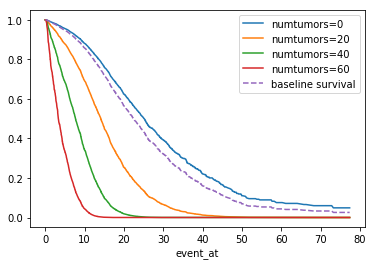

In [38]:
cph.plot_covariate_groups('numtumors', [0, 20, 40, 60]) #varies one variable keeping rest constant with time

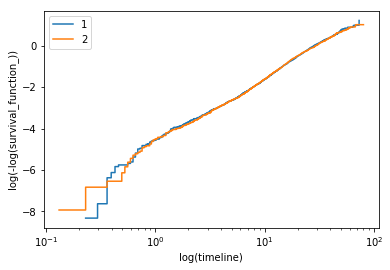

In [19]:
d_0 = df.loc[df['gender'] == 1]
d_1 = df.loc[df['gender'] == 2]

kmf0 = KaplanMeierFitter()
kmf0.fit(d_0['os_time'], event_observed=d_0['os_stat'])

kmf1 = KaplanMeierFitter()
kmf1.fit(d_1['os_time'], event_observed=d_1['os_stat'])

fig, axes = plt.subplots()
kmf0.plot_loglogs(ax=axes)
kmf1.plot_loglogs(ax=axes)
axes.legend([1, 2])

plt.show()                          #doesnt follow propotional hazard assmpt

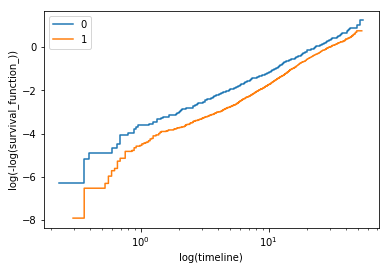

In [20]:
d_0 = df.loc[df['surg'] == 0]
d_1 = df.loc[df['surg'] == 1]

kmf0 = KaplanMeierFitter()
kmf0.fit(d_0['os_time'], event_observed=d_0['os_stat'])

kmf1 = KaplanMeierFitter()
kmf1.fit(d_1['os_time'], event_observed=d_1['os_stat'])

fig, axes = plt.subplots()
kmf0.plot_loglogs(ax=axes)
kmf1.plot_loglogs(ax=axes)
axes.legend([0, 1])

plt.show()                         # follows proportional hazard assmpt